# Estudo de Caso - Prática com Pontos

Este notebook tem o objetivo de praticar estudo de mapas com pontos, aplicando o conhecimento anterior ao caso apresentado.

In [9]:
## Importar Bibliotecas
import geopandas as gpd
import fiona as f
from pointpats import PointPattern
import matplotlib.pyplot as plt
import numpy as np

**TO-DO 1:** 

Importar os shapefiles, definir que o CRS é o EPSG:31983 (SIRGAS2000 UTM 23S), plotar o mapa dos limites administrativos juntamente com os monumentos.

In [3]:
municipiosSP = gpd.read_file('../data/SIRGAS_limites_municipios_estado_sao_paulo/SIRGAS_limites_municipais.shp')
municipiosSP.head(5)

,limite_id,municipio,Geometry_s,geometry
0,1,ITANHAÉM,1J6s,"POLYGON ((307339.109 7316497.555, 306260.118 7..."
1,10,EMBU-GUAÇU,1J6tf,"POLYGON ((306250.297 7350903.625, 306194.975 7..."
2,100,ITUVERAVA,NaN,"POLYGON ((194518.637 7762304.185, 194541.437 7..."
3,101,JABORANDI,NaN,"POLYGON ((142127.776 7701403.306, 142041.293 7..."
4,102,JABOTICABAL,NaN,"POLYGON ((150695.076 7658574.445, 150773.090 7..."


In [4]:
monumentosSP = gpd.read_file('../data/SIRGAS_SHP_monumento/SIRGAS_SHP_monumento_point.shp')
monumentosSP.head(5)

,mn_data,mn_id,mn_nome,mn_tombado,mn_link,mn_iphan,mn_fonte,mn_tipo,mn_materia,mn_local,mn_condeph,mn_conpres,mn_autor,geometry
0,1974 (escultura original) / 2006 (escultura nova),1.0,14 Bis,N,não consta,não consta,DPH/SMC,Escultura Figurativa,latăo alumínio bronze e granito,Praça Campo de Bagatelle,não consta,não consta,FUNCIONÁRIOS do Parque Aeronáutico de Marte,POINT (333637.300 7398590.160)
1,1978,2.0,70 Anos da Imigraçăo Japonesa,N,não consta,não consta,DPH/SMC,Marco,granito,Parque do Carmo,não consta,não consta,desconhecido,POINT (350667.890 7390880.200)
2,197-,3.0,A Caçadora,N,não consta,não consta,DPH/SMC,Grupo escultórico,Granito e bronze,Parque Ibirapuera,não consta,não consta,"COLUCCINI, Lélio",POINT (331146.280 7390415.510)
3,ca. 1922,4.0,A menina e o bezerro,N,não consta,não consta,DPH/SMC,Grupo escultórico,mármore Carrara e granito,Largo do Arouche,não consta,não consta,CHRISTOPHE,POINT (332024.140 7395581.360)
4,1977,5.0,A todos os companheiros,S,não consta,não consta,DPH/SMC,Placa,mármore,Largo Săo Francisco (próximo a entrada da Facu...,RES. SC 185/02,não consta,desconhecido,POINT (332932.250 7394659.500)


In [5]:
municipiosSP = municipiosSP.set_crs('EPSG:31983')
monumentosSP = monumentosSP.set_crs('EPSG:31983')

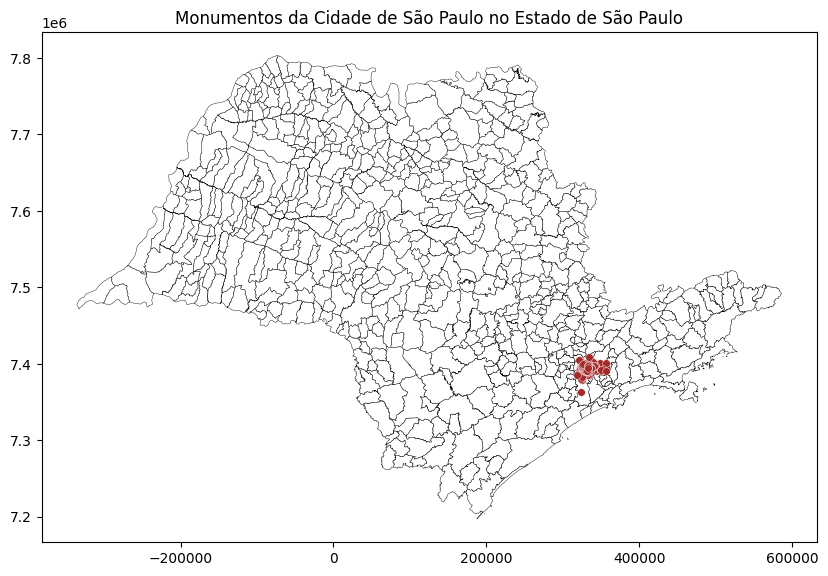

In [6]:
fig, grafico = plt.subplots(figsize=(10, 10))
municipiosSP.plot(ax=grafico, color='white', edgecolor='black', linewidth=0.3)
monumentosSP.plot(ax=grafico, color='brown', edgecolor="white", markersize=30, linewidth=0.3)
grafico.set_title('Monumentos da Cidade de São Paulo no Estado de São Paulo')
plt.show()

### Spacial Join - Junção espacial

Esta etapa é para entender como realizar uma junção de pontos, linhas ou áreas geográficas.

In [7]:
cidade_SP = gpd.sjoin(municipiosSP, monumentosSP, op='contains')[['municipio', 'geometry']].drop_duplicates()

/Users/fran-janela/Documents/Insper/8o/InfoGeo/aulas/env/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


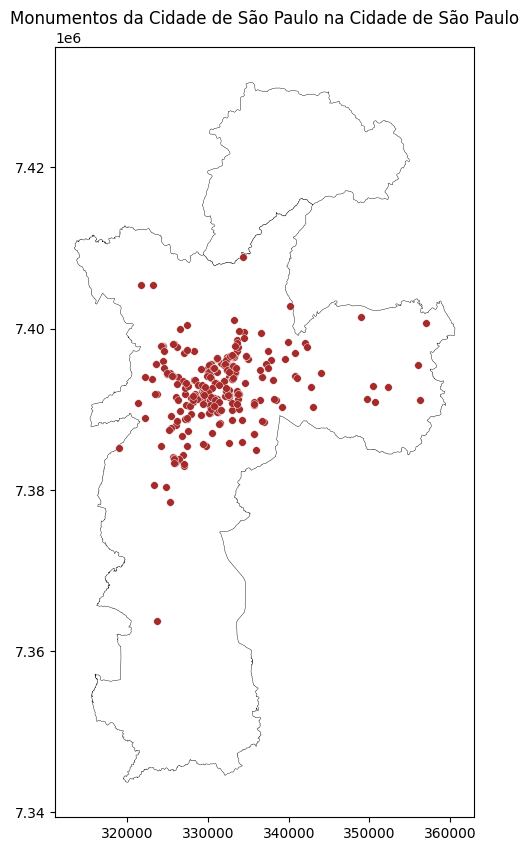

In [8]:
fig, grafico = plt.subplots(figsize=(10, 10))
cidade_SP.plot(ax=grafico, color='white', edgecolor='black', linewidth=0.3)
monumentosSP.plot(ax=grafico, color='brown', edgecolor="white", markersize=30, linewidth=0.3)
grafico.set_title('Monumentos da Cidade de São Paulo na Cidade de São Paulo')
plt.show()

**To-Do 2:**

- Instalar pointpats

- Fazer **análise espacial** dos clusters dos monumentos:
    - Quadrats
    - Mapa de Kernel
    - Função K de Ripley
    - Função K de Ripley com Envelopes, com Poisson de 250 iterações

In [10]:
x = monumentosSP['geometry'].x
y = monumentosSP['geometry'].y

pontos = np.vstack((x, y)).T

pp = PointPattern(pontos)

pp.points

/Users/fran-janela/Documents/Insper/8o/InfoGeo/aulas/env/lib/python3.11/site-packages/libpysal/cg/shapes.py:1492: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
/Users/fran-janela/Documents/Insper/8o/InfoGeo/aulas/env/lib/python3.11/site-packages/libpysal/cg/shapes.py:1208: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


,x,y
0,333637.299951,7.398590e+06
1,350667.889951,7.390880e+06
2,331146.279952,7.390416e+06
3,332024.139951,7.395581e+06
4,332932.249951,7.394659e+06
...,...,...
362,333342.770170,7.397896e+06
363,318888.824184,7.385206e+06
364,331659.367937,7.389981e+06
365,332938.591916,7.396688e+06


#### Quadrats

Abaixo, o código para entender os Quadrats

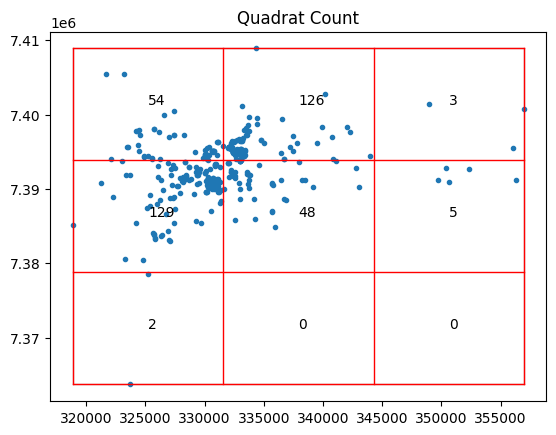

In [11]:
import pointpats.quadrat_statistics as qs

quadrats_monumentos = qs.QStatistic(pp, shape='rectangle', nx=3, ny=3)

quadrats_monumentos.plot()

In [12]:
quadrats_monumentos.chi2

559.3623978201636

In [13]:
quadrats_monumentos.chi2_pvalue

1.2662046860380595e-115

#### Mapa de Kernel

Abaixo, o mapa de Kernel

[]

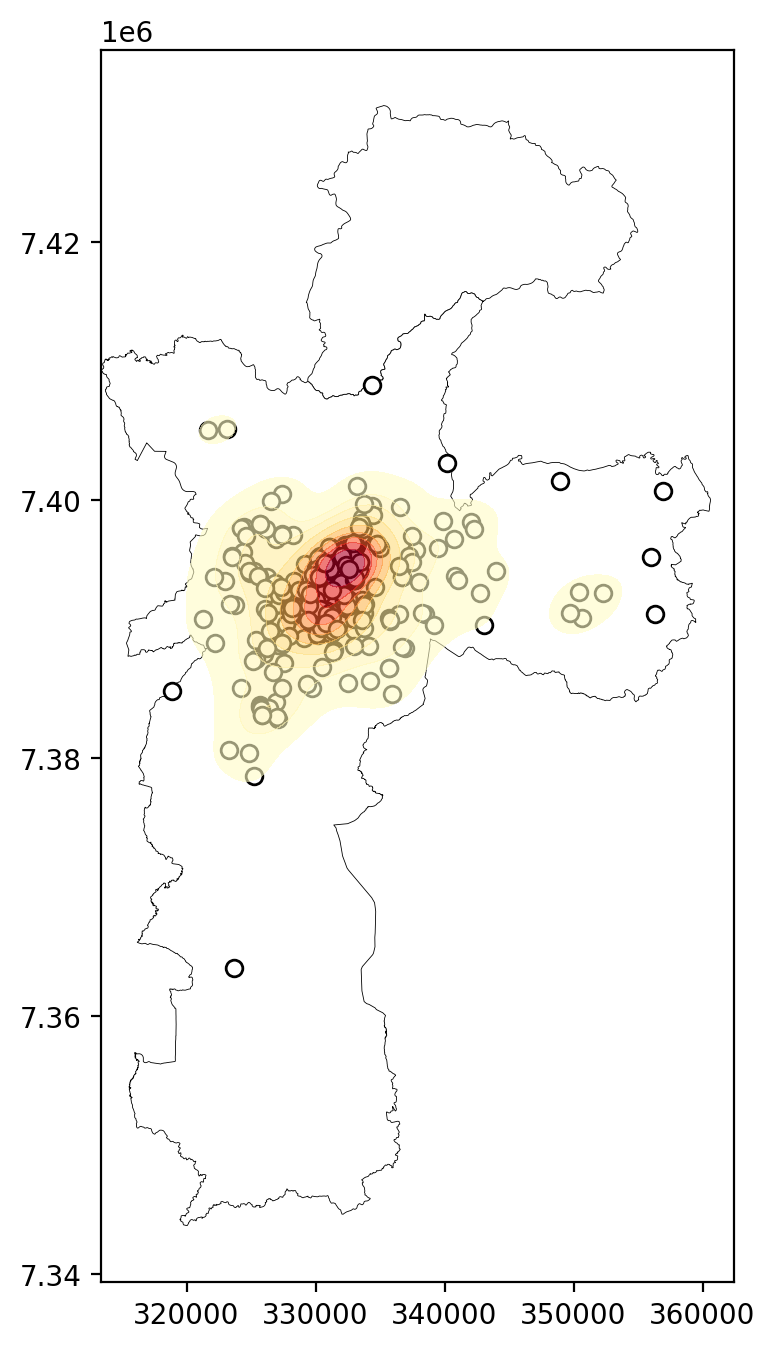

In [17]:
import seaborn as sns
%config InlineBackend.figure_format='retina'

fig, ax = plt.subplots(figsize=(10,8))
cidade_SP.plot(ax = ax, color='white', edgecolor='k', linewidth=0.3)
monumentosSP.plot(ax=ax, color='white', edgecolor='k')
sns.kdeplot(x=pontos[:,0], y=pontos[:,1], fill=True, cmap='YlOrRd', ax=ax, alpha=0.6)
plt.plot()

#### Função K de Ripley

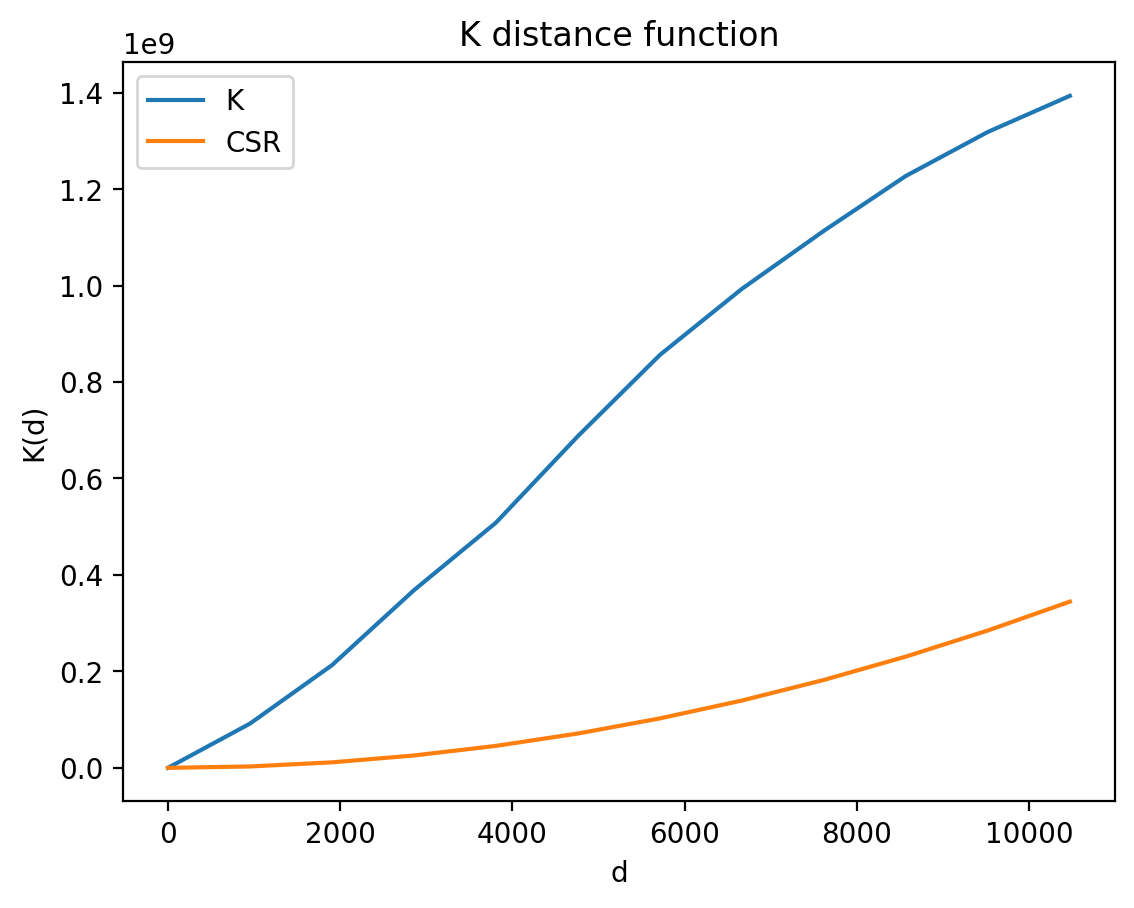

In [18]:
from pointpats.distance_statistics import K
from pointpats import PoissonPointProcess

kp = K(pp)

kp.plot()
plt.legend()

#### Função K de Ripley com Envelope

/Users/fran-janela/Documents/Insper/8o/InfoGeo/aulas/env/lib/python3.11/site-packages/libpysal/cg/shapes.py:1923: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
/Users/fran-janela/Documents/Insper/8o/InfoGeo/aulas/env/lib/python3.11/site-packages/libpysal/cg/shapes.py:103: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


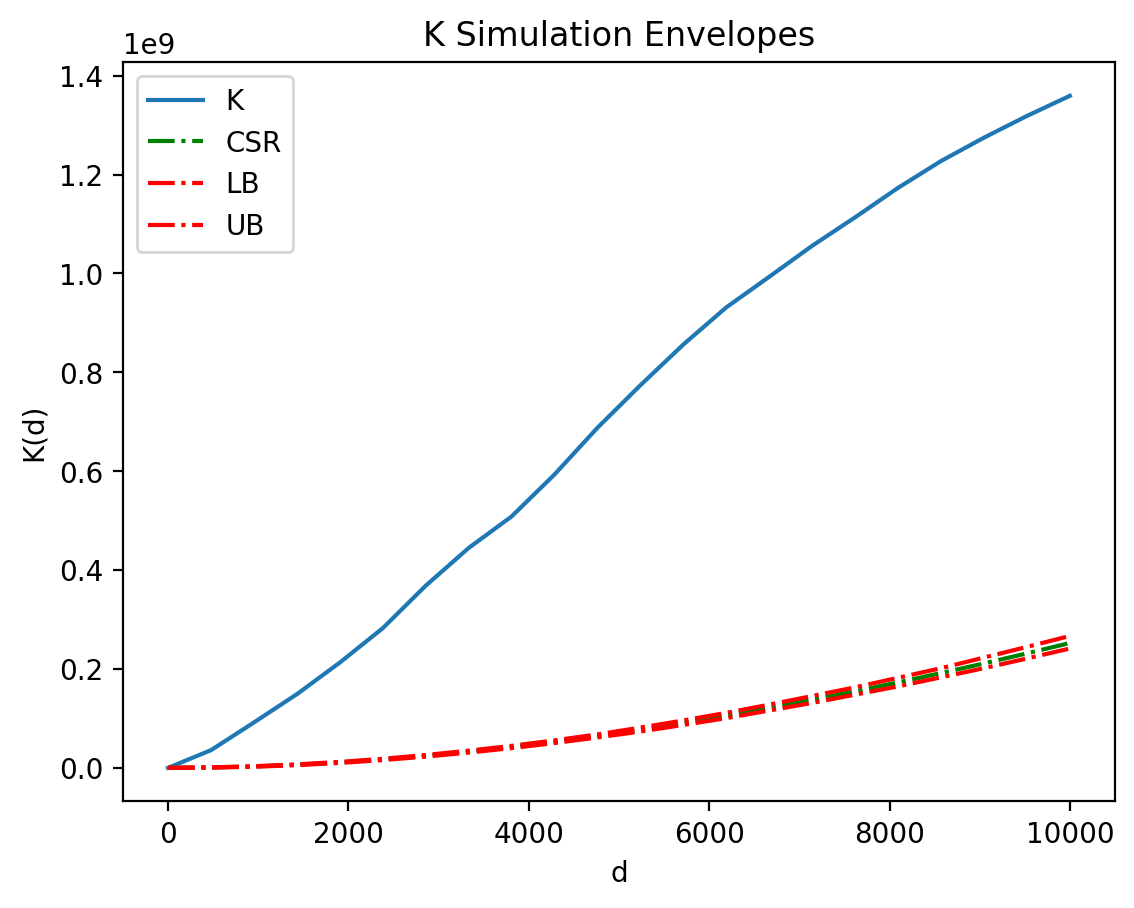

In [19]:
from pointpats.distance_statistics import Kenv

realizations = PoissonPointProcess(pp.window, pp.n, 250, asPP = True)

kenv = Kenv(pp, intervals=20, realizations=realizations)
kenv.plot()

### Contextualizando o Mapa de Kernel

In [21]:
import contextily

[]

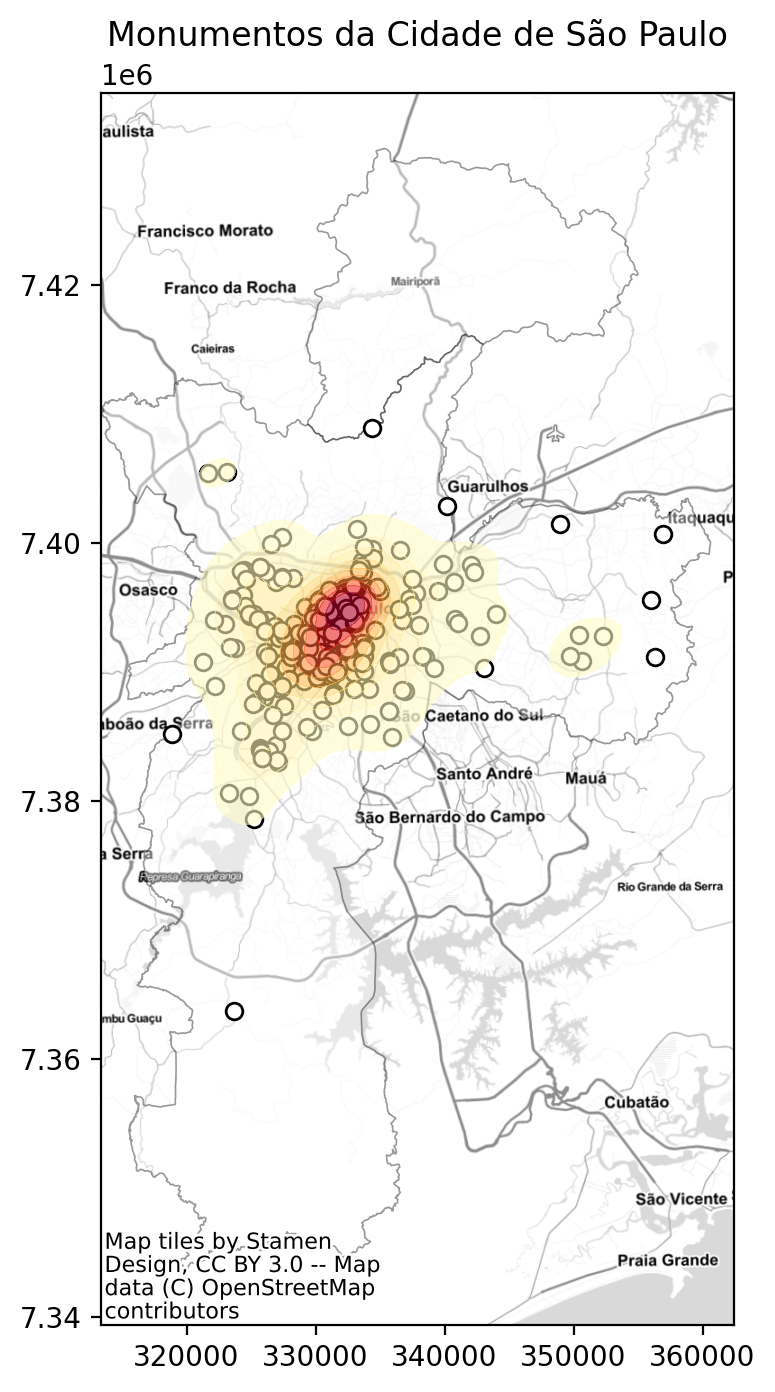

In [26]:
fig, ax = plt.subplots(figsize=(10,8))
cidade_SP.plot(ax = ax, color='white', edgecolor='k', linewidth=0.6, alpha=0.4)
monumentosSP.plot(ax=ax, color='white', edgecolor='k')
sns.kdeplot(x=pontos[:,0], y=pontos[:,1], fill=True, cmap='YlOrRd', ax=ax, alpha=0.6)
contextily.add_basemap(ax, crs=cidade_SP.crs.to_string(), source=contextily.providers.Stamen.TonerLite)
plt.title('Monumentos da Cidade de São Paulo')
plt.plot()